## Employee Attrition Prediction using Logistic Regression

McCurr Healthcare Consultancy is an MNC that has thousands of employees spread out across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources are spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

### Objective:
* To identify the different factors that drive attrition
* To make a model to predict if an employee will attrite or not

### Dataset:
The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # scale using z-score
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

# Metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# Tuning the model
from sklearn.model_selection import GridSearchCV

# # Ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file from the local directory
file_path = "../data/Data_HR_Employee_Attrition.csv"
employees = pd.read_csv(file_path)
employees

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,...,4,80,0,17,3,2,9,6,0,8


In [3]:
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/147Z67u4-bp_ZVlbc18dg6J3h9ORRlCcW/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
employees = pd.read_csv(csv_raw)
employees

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,...,4,80,0,17,3,2,9,6,0,8


## Exploratory Data Analysis (EDA)

In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observation:**
- There are 2940 observations and 34 columns.
- All the column have 2940 non-null values i.e. there are no missing values in the data.

In [5]:
# Checking unique values in each column
employees.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observation:**
- `EmployeeNumber` is an identifier which is unique for each employee and we can drop this column as it would not add any value to our analysis.
- `Over18` and `StandardHours` have only 1 unique value. These column will not add any value to our model hence we can drop them.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

Let's drop the columns mentioned above and define lists for numerical and categorical columns to apply explore them separately.

In [6]:
# Dropping the columns
employees=employees.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [7]:
#Creating numerical columns
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

#Creating categorical variables
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

### Univariate Analysis

In [8]:
# Checking summary statistics of numerical columns
employees[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 km radius** from the organization. However there are some extreme values, seeing as the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **Average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike 14% or less, with the maximum salary hike being 25%.
- Average number of years an employee is associated with the company is 7.
- **On average, the number of years since an employee got a promotion is 2.18**. The majority of employees have been promoted since the last year.

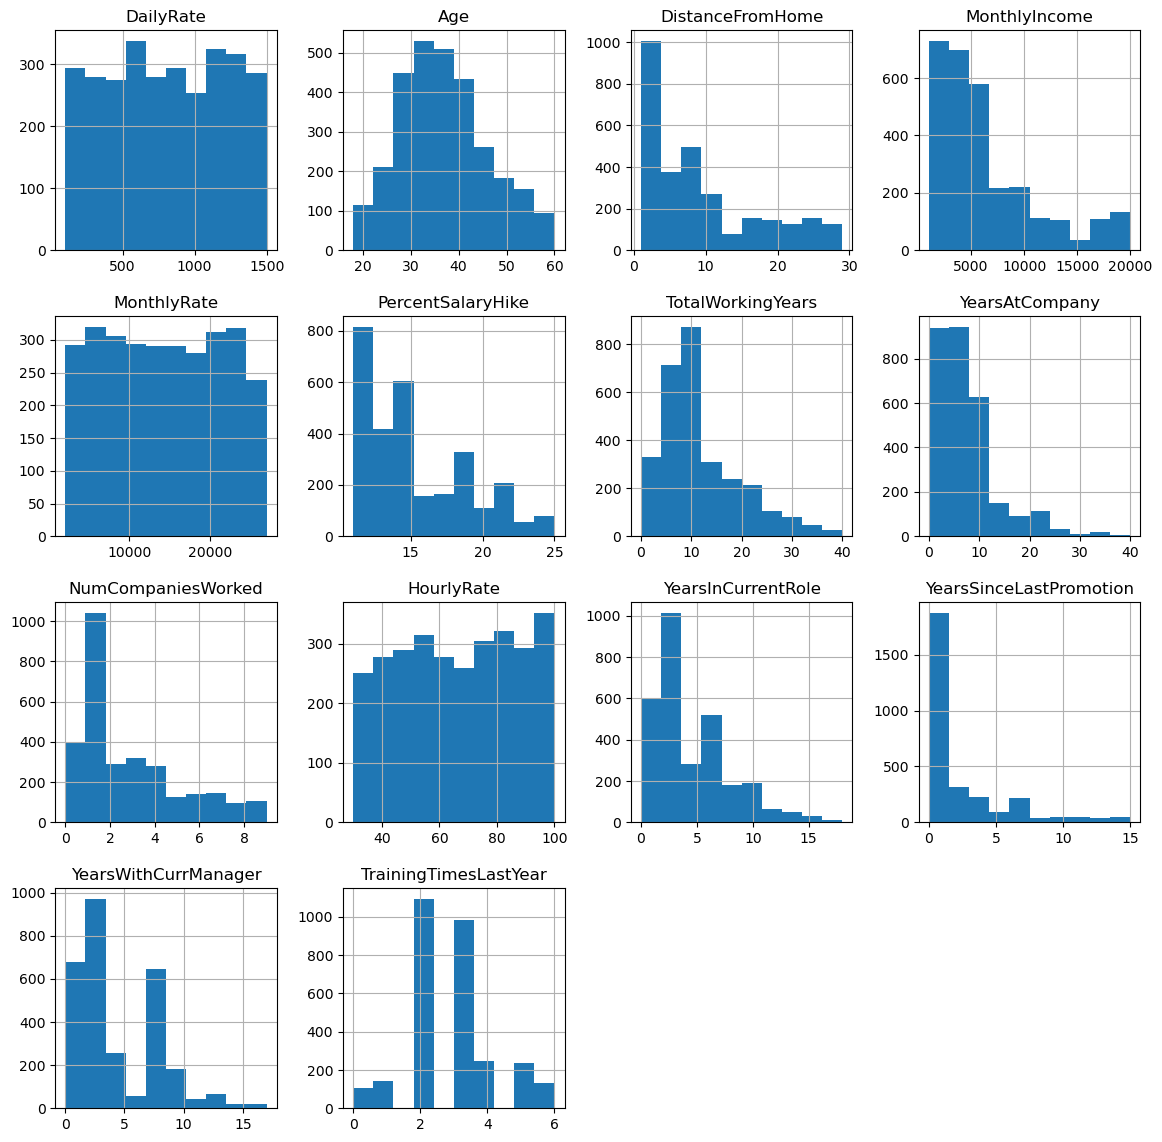

In [9]:
# Observing the distribution of numerical columns
employees[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of employees between the ages of 25 and 50.

- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increases.

- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.

- **DistanceFromHome also has a right skewed distribution**, meaning most employees live close to work but there are a few that live further away.

- **On average, an employee has worked at 2.5 companies.** Most employees have worked at only 1 company.

- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization.

- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.

- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees and the like.

- The distributions of DailyRate, HourlyRate and MonthlyRate appear to be uniform and do not provide much information. It could be that daily rate refers to the income earned per extra day worked while hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similiar for multiple employees in the same department, that explains the uniform distribution they show.

In [10]:
# Checking the proportion of sub-categories in each categorical column
for i in cat_cols:
    # This expresses the results as proportions rather than counts.
    print(employees[i].value_counts(normalize=True)) 
    print('*'*40)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
****************************************
OverTime
No     0.717007
Yes    0.282993
Name: proportion, dtype: float64
****************************************
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
****************************************
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
****************************************
Education
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: proportion, dtype: float64
****************************************
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64
************************

**Observations:**

- **The employee attrition rate is 16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side, and might indicate a stressed employee work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields.
- Over 65% of employees work in the Research & Development department of the organization.
- **Nearly 40% of the employees have low (1) or medium-low (2) job satisfaction** and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.
- **Over 30% of the employees show low (1) to medium-low (2) job involvement.**
- Over 80% of the employees either have none or very less stock options.
- **In terms of performance ratings, none of the employees have rated lower than 3 (excellent).** About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenerio is that the organization could be highly lenient with its performance appraisal process.

**Problem 1 - Data Summary Observations:**

**1.a.** The employee attrition rate is **16%.**
- Around 28% of the employees are working overtime.  
- **Implications: This suggests that there could be a problem with work-life balance in the company.    
    High rates of overtime may lead to stress.**

- 71% of the employees have traveled rarely, while around 19% have to travel frequently.

- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields.

**1.b.** Over **65%** of employees work in the Research & Development department of the organization.

**1.c.** Nearly **38.7% (19.7 + 19.0)** of the employees have low (1) or medium-low (2) job satisfaction in the organization.    
- **Implications: A significant percentage of employees are dissatisfied with their jobs. This could lead to low productivity, disengagement, and higher attrition rates. The company should investigate key reasons for dissatisfaction and implement strategies to improve employee satisfaction**

**1.d.** Over **31.1% (5.6 + 25.5)** of the employees show low (1) to medium-low (2) job involvement.

**1.e.** Over **83.4% (40.5 + 42.9)** of the employees either have none or very less stock options.

- In terms of performance ratings, none of the employees have rated lower than 3 (excellent). About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenerio is that the organization could be highly lenient with its performance appraisal process.

### Bivariate and Multivariate analysis

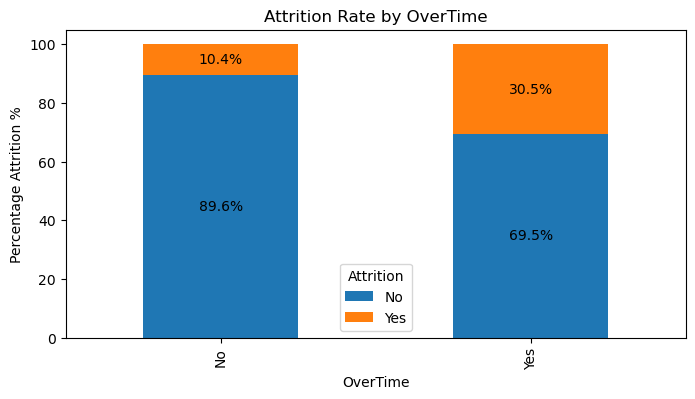

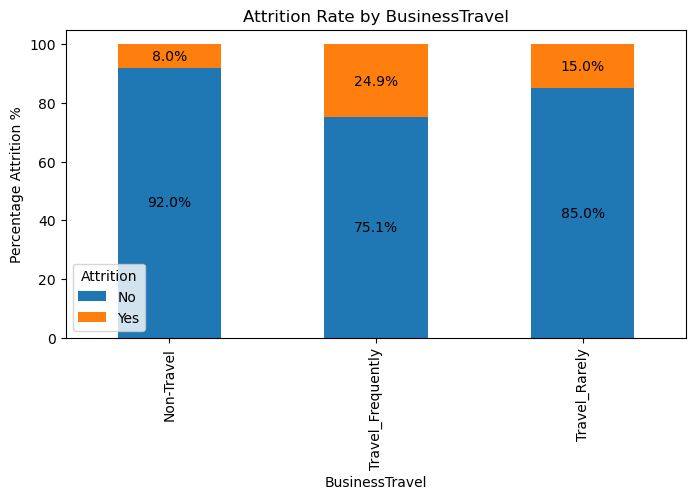

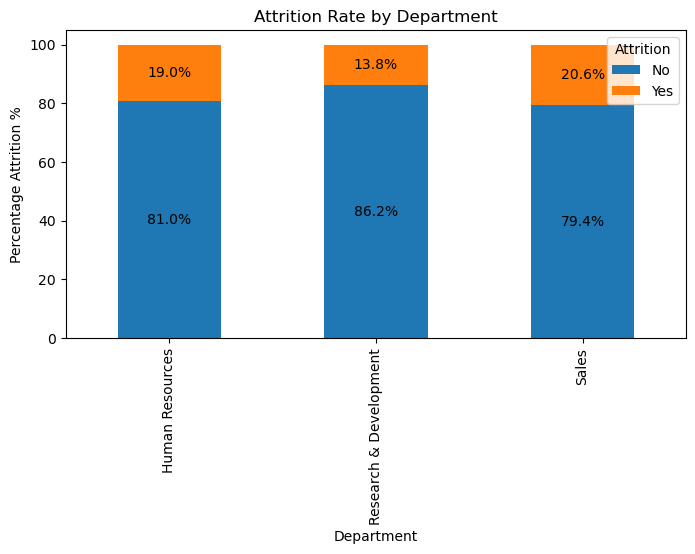

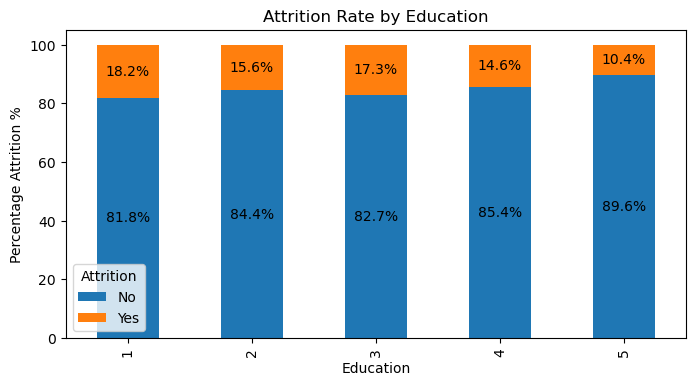

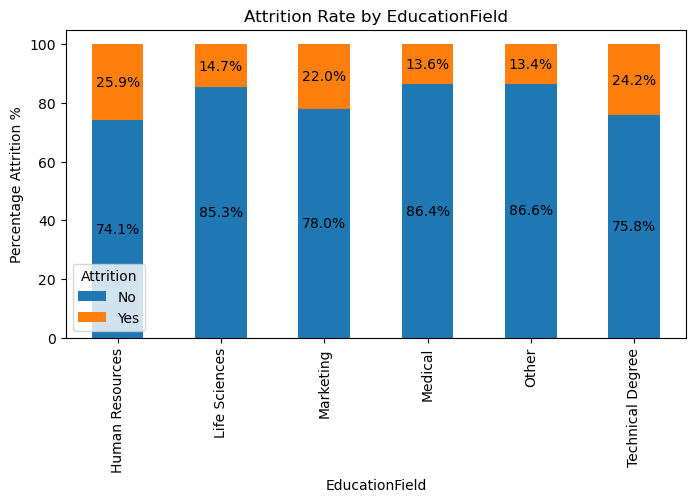

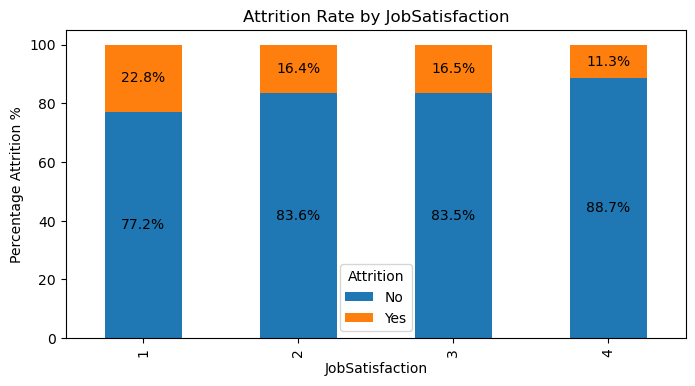

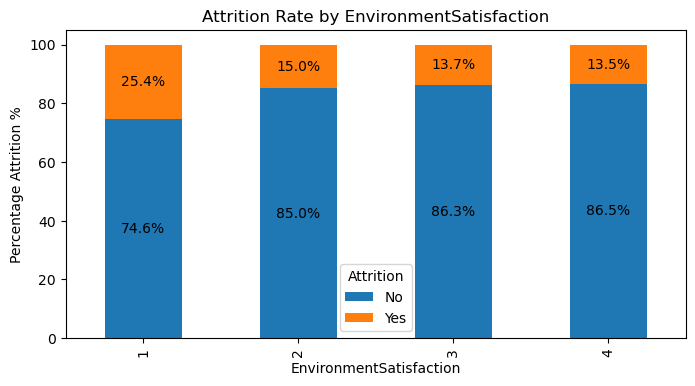

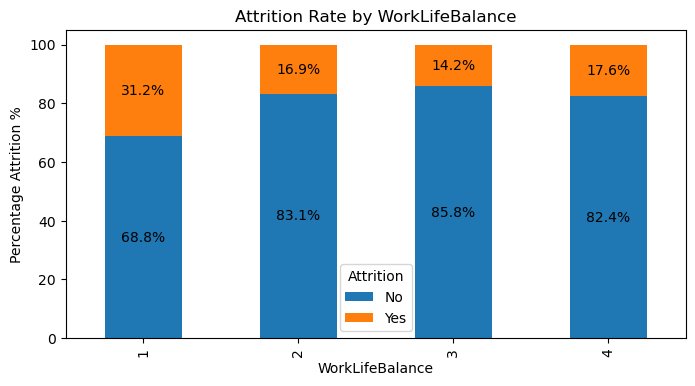

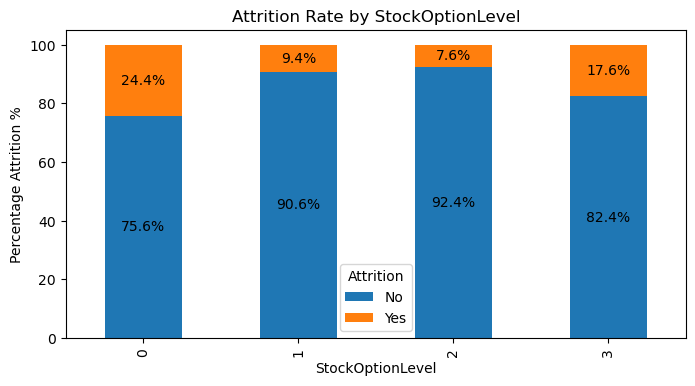

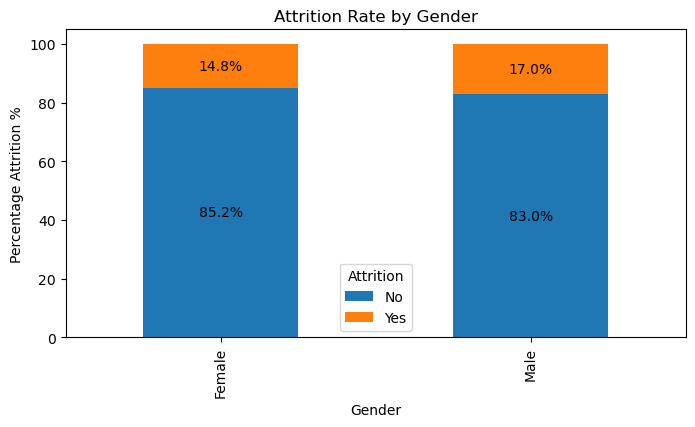

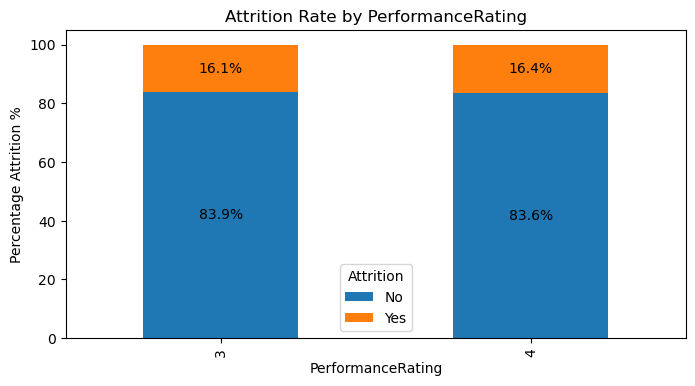

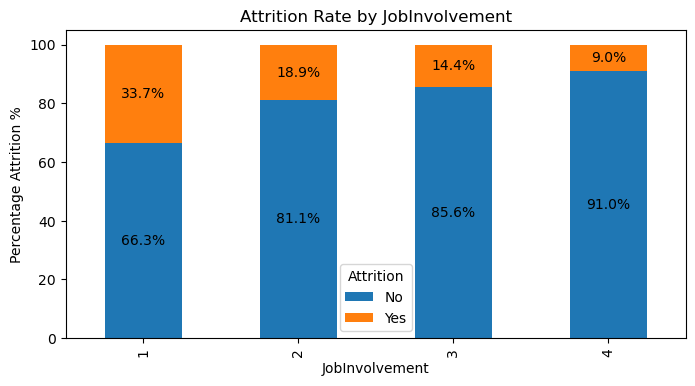

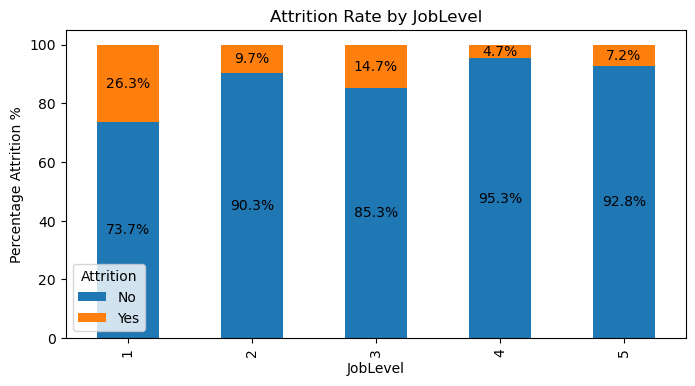

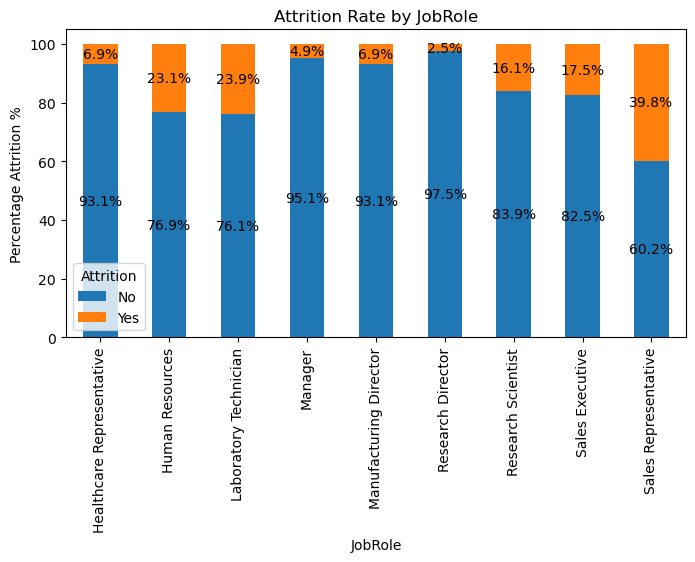

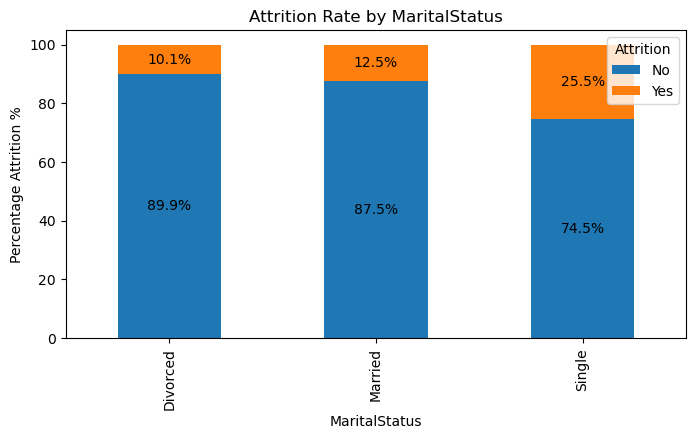

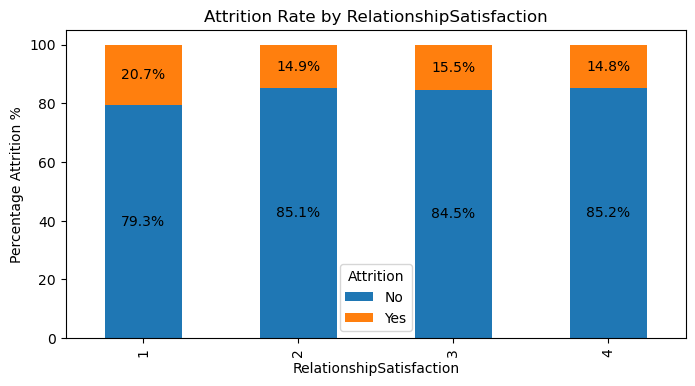

In [11]:
# for i in cat_cols:
#     if i!='Attrition':
#         (pd.crosstab(employees[i],employees['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
#         plt.ylabel('Percentage Attrition %')

# Plot stacked bar charts with percentage labels
for i in cat_cols:
    if i != 'Attrition':  # Skip 'Attrition' itself
        attrition_rates = pd.crosstab(employees[i], employees['Attrition'], normalize='index') * 100
        ax = attrition_rates.plot(kind='bar', figsize=(8, 4), stacked=True)

        # Add labels to each bar
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            if height > 0:  # Only label non-zero bars
                ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

        plt.ylabel('Percentage Attrition %')
        plt.title(f'Attrition Rate by {i}')
        plt.legend(title="Attrition", labels=['No', 'Yes'])
        plt.show()

In [12]:
# Calculate attrition percentages for each category
for i in cat_cols:
    if i != 'Attrition':  # Skip 'Attrition' itself
        attrition_rates = pd.crosstab(employees[i], employees['Attrition'], normalize='index') * 100
        print(f"Attrition rates for {i}:\n{attrition_rates}\n")

Attrition rates for OverTime:
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846

Attrition rates for BusinessTravel:
Attrition                 No        Yes
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855

Attrition rates for Department:
Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803

Attrition rates for Education:
Attrition         No        Yes
Education                      
1          81.764706  18.235294
2          84.397163  15.602837
3          82.692308  17.307692
4          85.427136  14.572864
5          89.583333  10.416667

Attrition rates for EducationField:
Attrition                No        Yes
EducationField 

**Observations:**
    
- **Employees working overtime have more than a 30% chance of attrition**,
which is very high compared to the 10% chance of attrition for employees who do not work extra hours.
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~15%
- **Employees working as sales representatives have an attrition rate of around 40%** while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
- **The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%.** The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
- **Employees at a lower job level also attrite more,** with 1-rated JobLevel employees showing a nearly 25% chance of attrition. These may be young employees who tend to explore more options in the initial stages of their careers.
- **A low work-life balance rating clearly leads employees to attrite**; 30% of those in the 1-rated category show attrition.

**Problem 2 - Categorical Variable Observations:**
    
**2.a.** Employees working overtime have more than a **30.5%** chance of attrition, which is very high compared to the **10.4%** chance of attrition for employees who do not work extra hours.
    
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~13.8%
     
**2.b.** Employees working as sales representatives have an attrition rate of around **39.8%** while HRs and Technicians have an attrition rate of around **23%**. 

- **Implications: Sales representatives show the highest attrition rate, possibly due to high-pressure sales targets, commission-based salaries, or lack of career stability. HR and Laboratory Technicians also experience higher attrition, which may be due to limited career advancement opportunities or job dissatisfaction.**
    
- The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at **33.7%**. The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
     
**2.c.** Employees at a lower job level also attrite more, with 1-rated JobLevel employees showing a nearly 25% chance of attrition. 

- **Implications: Lower-level employees may leave due to low salary, limited career growth, and lack of job security. Providing career progression opportunities and fair compensation could help reduce attrition**
   
**2.d.** A low work-life balance rating clearly leads employees to attrite; **31.3%** of those in the 1-rated category show attrition.

In [13]:
# Mean of numerical varibles grouped by attrition
employees.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observations:**

- **Employees leaving the company have a nearly 30% lower average income and 30% lesser work experience than those who are not.** These could be the employees looking to explore new options and/or increase their salary with a company switch.
- **Employees showing attrition also tend to live 16% further from the office than those who are not**. The longer commute to and from work could mean they have to spend more time/money every day, amd this could be leading to job dissatisfaction and wanting to leave the organization.

**Problem 3 - Quantitative Data Observations:**   

**3.a.** Employees leaving the company have an over 30% lower average income and 30% less work experience (TotalWorkingYears) than those who are not. 

Average Monthly Income of Employees Who Left: $4,787   
Average Monthly Income of Employees Who Stayed: $6,832   
Average Total Working Years of Employees Who Left: 7.8 years   
Average Total Working Years of Employees Who Stayed: 11.3 years   


- **Implications:** Lower-income employees are at a higher risk of leaving. The company should ensure competitive salaries aligned with industry standards. Employees with fewer years of experience might feel less engaged or lack career growth opportunities, leading to higher attrition.
    
**3.b.** Employees showing attrition also tend to live 19% further from the office than those who are not. 

Average Distance from Home of Employees Who Left: 10.6 km   
Average Distance from Home of Employees Who Stayed: 8.9 km   

- **Implications:** Employees who live farther from work might experience longer commutes, higher transportation costs, or work-life balance issues, leading to higher attrition. The company could consider remote work options or flexible work arrangements to retain employees who live farther away

#### Correlation Analysis

<Axes: >

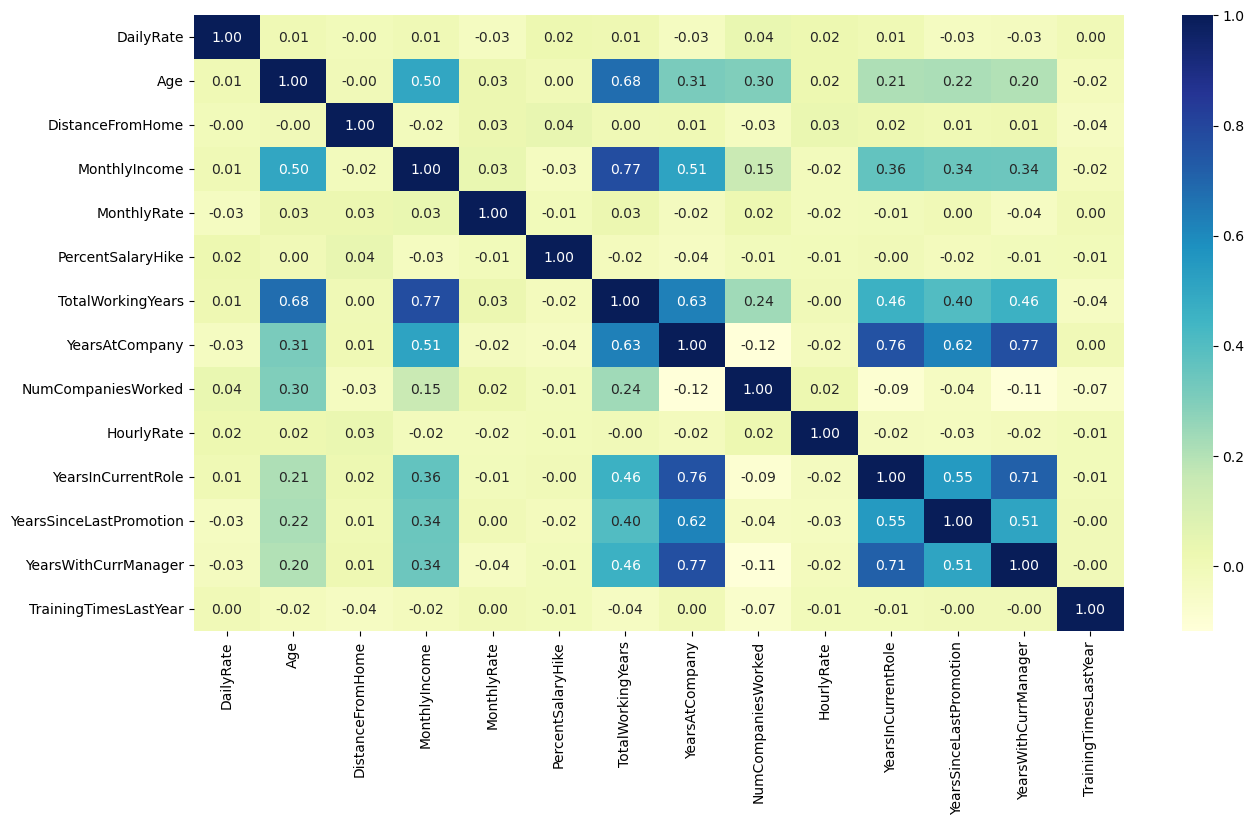

In [14]:
# Correation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(employees[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [15]:
# Compute correlation matrix
corr = employees[num_cols].corr()

# Display the correlation values sorted by strength
corr_unstacked = corr.unstack().reset_index()
corr_unstacked.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_unstacked = corr_unstacked[corr_unstacked['Variable 1'] != corr_unstacked['Variable 2']]  # Remove self-correlation

# Sort correlations in descending order
corr_unstacked = corr_unstacked.sort_values(by="Correlation", ascending=False)
corr_unstacked.head(15)

,Variable 1,Variable 2,Correlation
48,MonthlyIncome,TotalWorkingYears,0.772893
87,TotalWorkingYears,MonthlyIncome,0.772893
175,YearsWithCurrManager,YearsAtCompany,0.769212
110,YearsAtCompany,YearsWithCurrManager,0.769212
108,YearsAtCompany,YearsInCurrentRole,0.758754
147,YearsInCurrentRole,YearsAtCompany,0.758754
152,YearsInCurrentRole,YearsWithCurrManager,0.714365
178,YearsWithCurrManager,YearsInCurrentRole,0.714365
20,Age,TotalWorkingYears,0.680381
85,TotalWorkingYears,Age,0.680381


**Observations:**

- **Total work experience, monthly income, years at company and years with current manager are highly correlated with each other and with employee age** which is easy to understand as these variables show an increase with age for most employees.
- Years at company and years in current role are correlated with years since last promotion which means that the company is not giving promotions at the right time.

**Problem 4 - Correlation Analysis:**

**4.a.** **YearsWithCurrManager & YearsAtCompany (0.77), MonthlyIncome & TotalWorkingYears (0.77), YearsAtCompany & YearsInCurrentRole (0.76) and YearsInCurrentRole & YearsWithCurrManager (0.71)** are highly correlated with each other.
   
**4.b.** **YearsAtCompany** and **YearsInCurrent Role** are correlated with **YearsSinceLastPromotion** which means that the company is not giving promotions at the right time.

## Employee Attrition (Logistic Regression)

1. Prepare data for modeling
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

#### Prepare data for modeling
- **Drop columns:** EmployeeNumber, Over18, StandardHours
- **Convert categorical columns to numerical:** Use one-hot encoding to convert categorical columns to numerical.
- **Split data into X and Y:** Split the data into independent and dependent variables.
- **Split data into train and test set:** Split the data into train and test set.

In [16]:
# Creating list of dummy columns
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

# Creating dummy variables
employees = pd.get_dummies(data = employees, columns= to_get_dummies_for, drop_first= True)

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}

employees['OverTime'] = employees.OverTime.map(dict_OverTime)
employees['Attrition'] = employees.Attrition.map(dict_attrition)

In [17]:
# Separating the independent variables (X) and the dependent variable (Y)
Y= employees.Attrition
X= employees.drop(columns = ['Attrition'])

### Scaling the data

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [18]:
# Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
# Splitting the data into 70% train and 30% test set with stratified sampling

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.3, random_state=42, stratify=Y
)

### Model evaluation criterion

**The model can make two types of wrong predictions:**
1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite and the employee actually attrites

**What are the consequeces of predicting that the employee will not attrite but the employee attrites?**     
- If the model incorrectly predicts that an employee will stay, the company will not provide retention incentives to an employee who is actually at risk of leaving.
- This leads to increased turnover costs, such as recruitment, training, and lost productivity.
- High turnover can negatively affect morale, efficiency, and employer reputation.

**Why would the company want to maximize the Recall of the model?**
- Recall measures how many actual attrition cases were correctly identified.
- In this case, missing an at-risk employee is more costly than falsely predicting an employee will leave.
- Higher recall = fewer false negatives, meaning the company correctly identifies and retains more at-risk employees.

In [20]:
# Create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Building the model

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

$$ P(y)=1/exp(1 + exp(-x)) $$

In [21]:
# Instantiate the model
lg = LogisticRegression()

In [22]:
# Fit the model to the training data
lg.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1726
           1       0.78      0.51      0.62       332

    accuracy                           0.90      2058
   macro avg       0.85      0.74      0.78      2058
weighted avg       0.89      0.90      0.89      2058



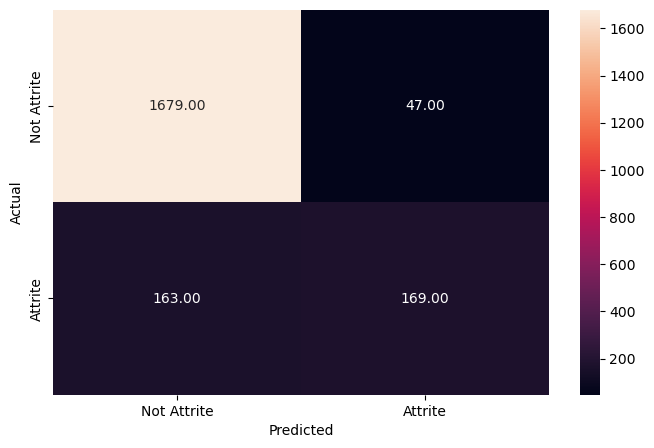

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       740
           1       0.68      0.43      0.53       142

    accuracy                           0.88       882
   macro avg       0.79      0.70      0.73       882
weighted avg       0.86      0.88      0.86       882



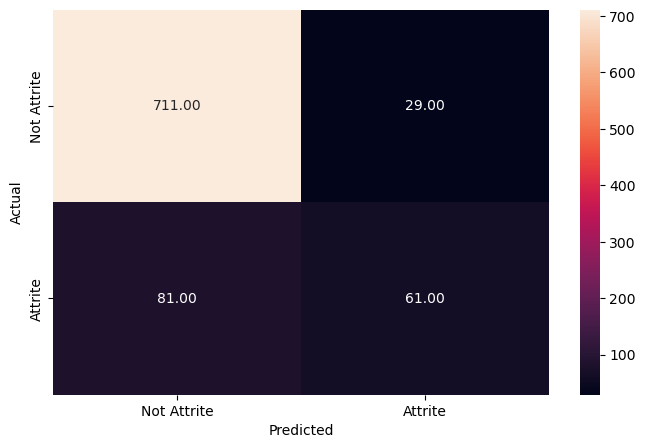

In [23]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

# Checking the performance on the test dataset
y_pred_test = lg.predict(x_test)

metrics_score(y_test, y_pred_test)

**Observations:**

- Observation 1: The model has moderate accuracy, likely due to an imbalanced dataset (~16% attrition cases).
- Observation 2: Recall is more important than precision because we want to correctly identify most at-risk employees.
- Observation 3: If precision is low, the model may be over-predicting attrition, leading to unnecessary incentives.
- Observation 4: If the F1-score is low, we might need to improve feature selection or use SMOTE (oversampling) to balance the dataset.

In [24]:
# Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition

cols=X.columns
coef_lg=lg.coef_
pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
BusinessTravel_Travel_Frequently,1.085184
OverTime,0.894470
BusinessTravel_Travel_Rarely,0.816460
YearsAtCompany,0.721946
JobRole_Sales Executive,0.633250
NumCompaniesWorked,0.625907
YearsSinceLastPromotion,0.601013
MaritalStatus_Single,0.521254
DistanceFromHome,0.452588
JobLevel_5,0.358362


**Observations:**

**Features which string positive affect on the attrition rate are:**
- OverTime
- BusinessTravel_Travel_Frequently
- Department_Research & Development
- JobRole_Sales Executive
- MaritalStatus_Single
- Department_Sales
- NumCompaniesWorked
- YearsSinceLastPromotion
- JobLevel_5
- BusinessTravel_Travel_Rarely
- DistanceFromHome
- YearsAtCompany
- JobRole_Human Resources
- JobRole_Sales Representative

**Features which string negative affect on the attrition rate are:**
- MonthlyIncome
- JobInvolvement_3
- JobLevel_2
- EnvironmentSatisfaction_4
- JobInvolvement_4
- JobInvolvement_2
- EnvironmentSatisfaction_3
- EducationField_Life Sciences
- EnvironmentSatisfaction_2
- YearsWithCurrManager
- JobRole_Research Director
- TotalWorkingYears
- JobSatisfaction

**The features identified as important are similar for both the Tree model and the logistic regression model. Notice that we are able to see a bit more detail in the logistic regression results with the + and - contributions.**

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [25]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, x_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
BusinessTravel_Travel_Frequently,2.959983
OverTime,2.446038
BusinessTravel_Travel_Rarely,2.262477
YearsAtCompany,2.058435
JobRole_Sales Executive,1.883723
NumCompaniesWorked,1.869941
YearsSinceLastPromotion,1.823965
MaritalStatus_Single,1.684138
DistanceFromHome,1.572377
JobLevel_5,1.430984


### Meaning of Coefficients
EXAMPLE: The odds of an employee working overtime to attrite are **2.6 times** the odds of one who is not, probably due to the fact that working overtime is not sustainable for an extended duration for any employee, and may lead to burnout and job dissatisfaction.
     
**What is the impact of frquent travel on the odds that an employee will attrite?**
- Frequent business travel increases the odds of attrition.
- The odds ratio from logistic regression suggests that employees who travel frequently are more likely to leave than those who travel rarely.

**What is the impact of marital status on the odds that an employee will attrite?**
- Single employees have a higher likelihood of attrition compared to married employees.
- This may be due to single employees having fewer family commitments, making it easier to switch jobs.


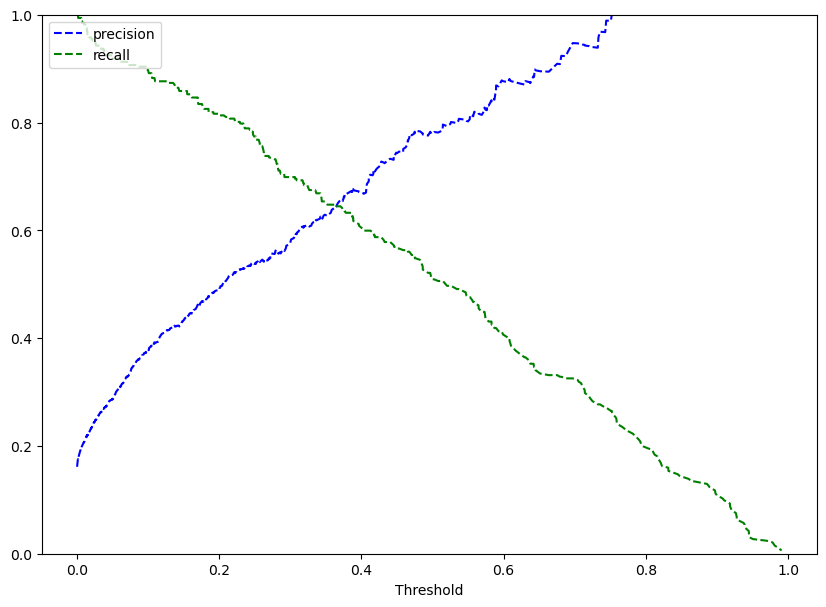

In [26]:
### Precision Recall Curve

y_scores_lg=lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.35**.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1726
           1       0.63      0.65      0.64       332

    accuracy                           0.88      2058
   macro avg       0.78      0.79      0.78      2058
weighted avg       0.88      0.88      0.88      2058



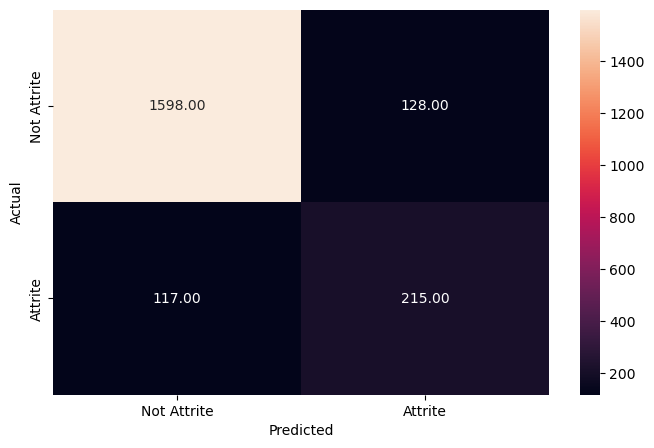

In [27]:
# Performance of the model at this threshold on the training data

optimal_threshold1=.35
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

The model performance has improved. The recall has increased significantly for class 1.

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       740
           1       0.56      0.58      0.57       142

    accuracy                           0.86       882
   macro avg       0.74      0.75      0.74       882
weighted avg       0.86      0.86      0.86       882



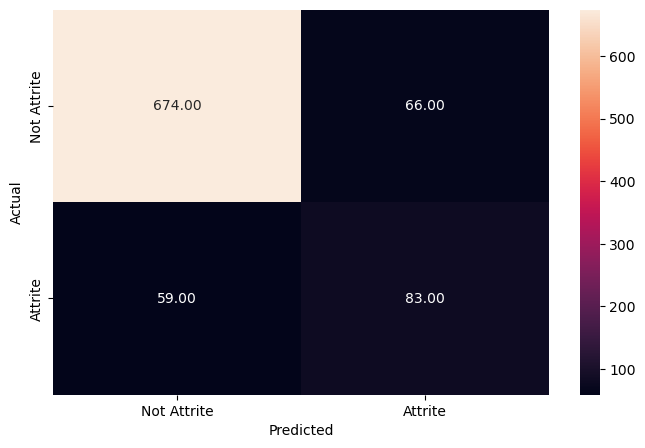

In [28]:
# Performance of the model at this threshold on test data

optimal_threshold1=.35
y_pred_test = lg.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Understanding Feature Importance**:   
**Question**: Based on the logistic regression model, which features were the most important predictors of employee attrition? How can these features be used by the HR department to reduce attrition rates?

Top factors increasing attrition include:
* Overtime: High workload increases stress, leading to attrition.
* Frequent Business Travel: Employees with frequent travel are more likely to leave.
* Low Salary Growth: Employees with fewer promotions and salary hikes have higher attrition risk.

Top factors reducing attrition:
* High Monthly Income: Employees with better salaries stay longer.
* Strong Job Satisfaction & Work-Life Balance: Employees with high satisfaction scores are less likely to leave.

HR Action Plan:
* Improve work-life balance and reduce overtime.
* Provide better incentives for high-risk employees.
* Ensure timely promotions and salary hikes.

**Model Evaluation**:   
**Question**: How did the model perform in terms of accuracy, precision, recall, and F1 score? Based on these metrics, would you consider this model suitable for predicting employee attrition? Why or why not?

Key Metrics:
* Accuracy: Measures overall correctness of predictions.
* Precision: Measures how many predicted attrition cases were correct.
* Recall: Measures how many actual attrition cases were correctly identified.
* F1-Score: Balances precision and recall.

> If recall is low, the model fails to identify many at-risk employees.   
> If precision is low, the model over-predicts attrition, causing unnecessary retention incentives.   
> The model should prioritize recall to capture at-risk employees and prevent costly turnover.   

**Interpreting Odds Ratios**:    
**Question**: When interpreting the odds ratios for your logistic regression model, what does it mean if an odds ratio for a feature is greater than 1? Can you provide an example from your analysis?

* Odds Ratio > 1: Increases the likelihood of attrition.   
* Odds Ratio < 1: Decreases the likelihood of attrition.   
   * Example: Overtime Odds = 2.6 → Employees working overtime are 2.6x more likely to leave than those who don’t.

**Model Improvement**:    
**Question**: If you wanted to improve the predictive power of your model, what additional features or transformations would you consider? Why might these features be important in predicting employee attrition?

* Address Class Imbalance: Use SMOTE (Synthetic Minority Oversampling) to balance attrition cases.  
* Feature Engineering: Create new features like “Promotion Delay” (YearsSinceLastPromotion / TotalWorkingYears).
* Hyperparameter Tuning: Adjust regularization (C) in logistic regression to prevent overfitting.
* Try Different Models: Compare Random Forest, XGBoost, and Neural Networks to improve prediction accuracy.
